# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = f'http://api.openweathermap.org/'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
city_lat = 0
city_lng = 0

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_latlon_url = f'http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_key}'
        city_latlon = requests.get(city_latlon_url).json()
        city_lat = city_latlon[0]['lat']
        city_lng = city_latlon[0]['lon']

        city_weather_url = f'https://api.openweathermap.org/data/2.5/weather?lat={city_lat}&lon={city_lng}&units=metric&appid={weather_key}'
        city_weather = requests.get(city_weather_url).json()
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except (IndexError, KeyError):
        print(f"City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | linhares


Processing Record 2 of Set 1 | rancho palos verdes
Processing Record 3 of Set 1 | tyniste nad orlici
Processing Record 4 of Set 1 | balqash
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | fuvahmulah
Processing Record 7 of Set 1 | zangguy
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | kill devil hills
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | st. paul
Processing Record 14 of Set 1 | ayr
Processing Record 15 of Set 1 | ulladulla
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | igarka
Processing Record 18 of Set 1 | kapa'a
Processing Record 19 of Set 1 | dakhla
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | phan rang-thap cham
Processing Record 22 of Set 1 | saint-denis
Processing Record 23 of Set 1 | port elizabeth
Processing Record 24 of Set 1 | yellowknife
Proce

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,linhares,-19.381694,-40.061221,23.42,79,71,2.38,BR,1702247136
1,rancho palos verdes,33.748331,-118.370768,25.25,31,0,5.14,US,1702247138
2,tyniste nad orlici,50.151363,16.077697,4.84,89,87,3.35,CZ,1702247139
3,balqash,46.843321,74.977328,-9.03,47,100,4.22,KZ,1702247140
4,vorgashor,67.581192,63.783737,-24.92,100,100,3.25,RU,1702247141


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,linhares,-19.381694,-40.061221,23.42,79,71,2.38,BR,1702247136
1,rancho palos verdes,33.748331,-118.370768,25.25,31,0,5.14,US,1702247138
2,tyniste nad orlici,50.151363,16.077697,4.84,89,87,3.35,CZ,1702247139
3,balqash,46.843321,74.977328,-9.03,47,100,4.22,KZ,1702247140
4,vorgashor,67.581192,63.783737,-24.92,100,100,3.25,RU,1702247141


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

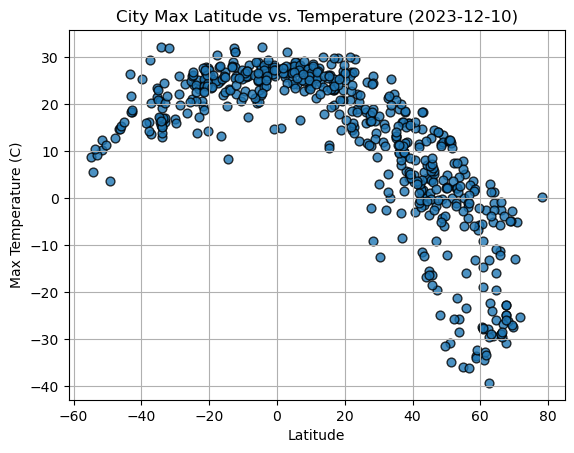

In [35]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter',
                  x='Lat',
                  xlabel='Latitude',
                  y='Max Temp',
                  ylabel='Max Temperature (C)',
                  title='City Max Latitude vs. Temperature (2023-12-10)',
                  grid=True,
                  s=40,
                  alpha=0.8,
                  edgecolor='k'
                  )

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

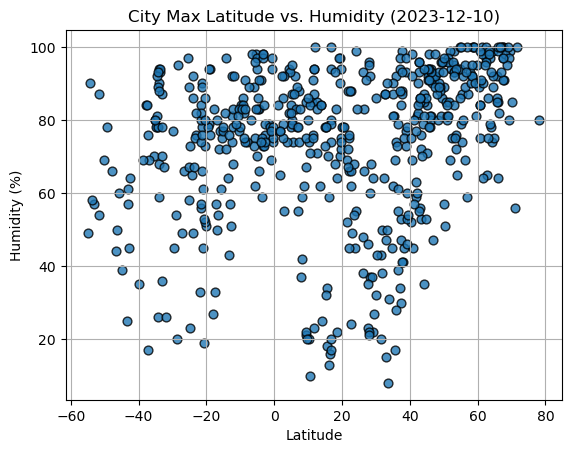

In [37]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter',
                  x='Lat',
                  xlabel='Latitude',
                  y='Humidity',
                  ylabel='Humidity (%)',
                  title='City Max Latitude vs. Humidity (2023-12-10)',
                  grid=True,
                  s=40,
                  alpha=0.8,
                  edgecolor='k'
                  )

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

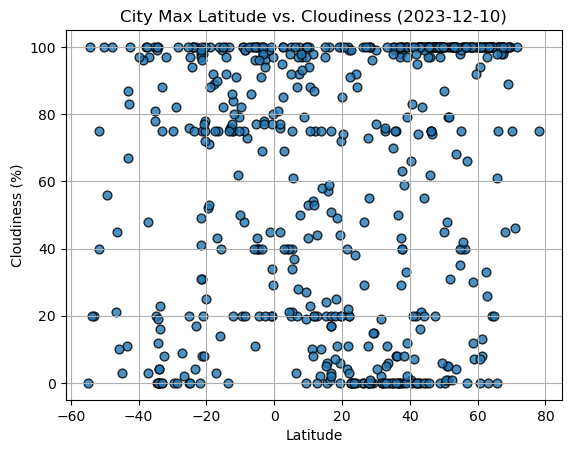

In [38]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter',
                  x='Lat',
                  xlabel='Latitude',
                  y='Cloudiness',
                  ylabel='Cloudiness (%)',
                  title='City Max Latitude vs. Cloudiness (2023-12-10)',
                  grid=True,
                  s=40,
                  alpha=0.8,
                  edgecolor='k'
                  )

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

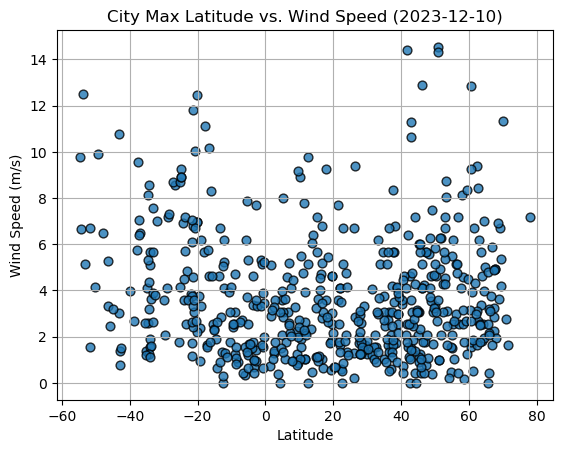

In [40]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter',
                  x='Lat',
                  xlabel='Latitude',
                  y='Wind Speed',
                  ylabel='Wind Speed (m/s)',
                  title='City Max Latitude vs. Wind Speed (2023-12-10)',
                  grid=True,
                  s=40,
                  alpha=0.8,
                  edgecolor='k'
                  )

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
def generate_regression(df, x_name, y_name, output_image_file_name,xy_regression_label, hemisphere):
    
    df.plot(kind='scatter', x=x_name, xlabel='Latitude', y=y_name, ylabel=y_name, title=hemisphere)
    
    x = df[x_name]
    y = df[y_name]
    m, b, r, _, _ = linregress(x, y)
    print(f'The r-value is: {r}')

    y_regression = m * x + b
    plt.plot(x, y_regression, color='red')

    formula_text = f'y = {m:.2f}x + {b:.2f}'
    plt.annotate(formula_text,xy_regression_label,fontsize=15,color="red")

    plt.savefig(f'output_data/{output_image_file_name}.png')
    plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
mask_nhemi = city_data_df['Lat'] >= 0
northern_hemi_df = city_data_df[mask_nhemi]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rancho palos verdes,33.748331,-118.370768,25.25,31,0,5.14,US,1702247138
2,tyniste nad orlici,50.151363,16.077697,4.84,89,87,3.35,CZ,1702247139
3,balqash,46.843321,74.977328,-9.03,47,100,4.22,KZ,1702247140
4,vorgashor,67.581192,63.783737,-24.92,100,100,3.25,RU,1702247141
6,zangguy,37.356780,78.794665,1.52,30,98,4.19,CN,1702247144


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[~mask_nhemi]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,linhares,-19.381694,-40.061221,23.42,79,71,2.38,BR,1702247136
5,fuvahmulah,-0.294841,73.424065,27.66,74,97,1.99,MV,1702247142
7,new norfolk,-42.780200,147.061533,18.42,45,83,1.39,AU,1702247145
9,bredasdorp,-34.533055,20.042778,16.23,78,0,2.59,ZA,1702247147
10,jamestown,-15.927730,-5.716087,21.85,77,14,8.31,SH,1702247149


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.830814232068819


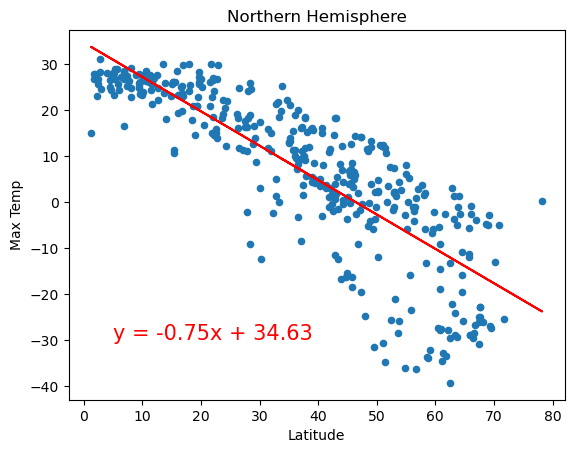

In [82]:
# Linear regression on Northern Hemisphere
output_image_file_name = 'Fig5'
hemisphere = 'Northern Hemisphere'
xy_regression_label = (5,-30)
generate_regression(northern_hemi_df, 'Lat', 'Max Temp',output_image_file_name,xy_regression_label, hemisphere)

The r-value is: 0.6617702449471466


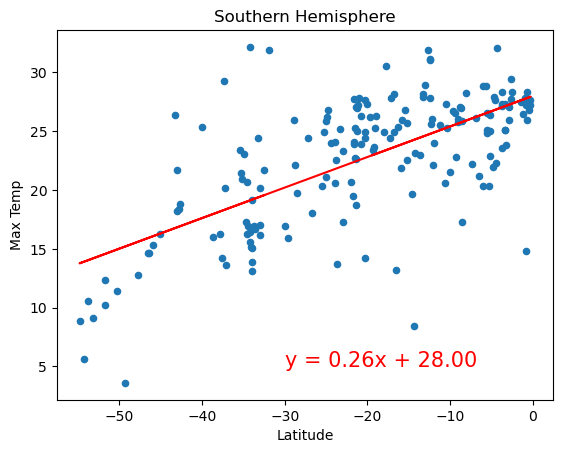

In [83]:
# Linear regression on Southern Hemisphere
output_image_file_name = 'Fig6'
hemisphere = 'Southern Hemisphere'
xy_regression_label = (-30,5)
generate_regression(southern_hemi_df, 'Lat', 'Max Temp',output_image_file_name,xy_regression_label, hemisphere)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.35592289657253884


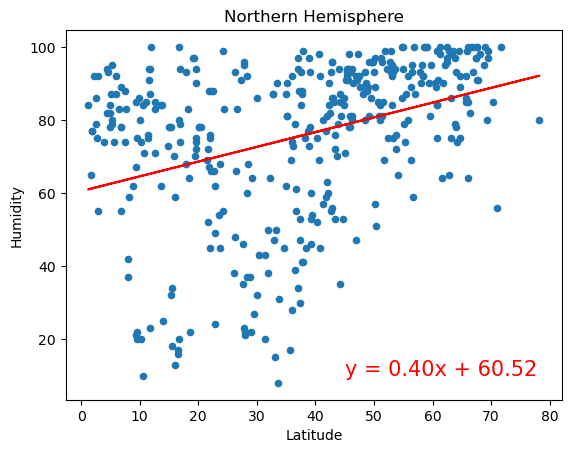

In [84]:
# Northern Hemisphere
output_image_file_name = 'Fig7'
hemisphere = 'Northern Hemisphere'
xy_regression_label = (45,10)
generate_regression(northern_hemi_df, 'Lat', 'Humidity',output_image_file_name,xy_regression_label, hemisphere)

The r-value is: 0.3352521804832061


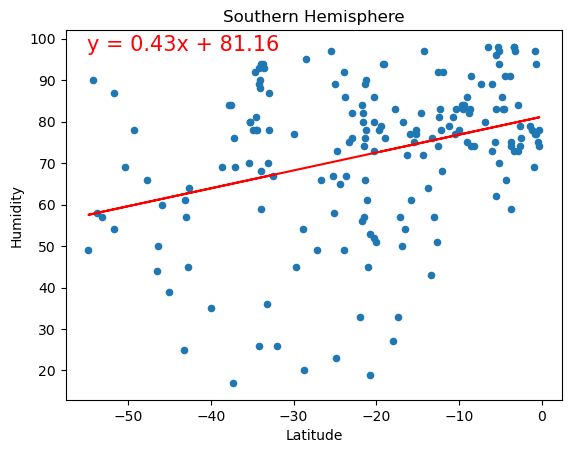

In [85]:
# Southern Hemisphere
output_image_file_name = 'Fig8'
hemisphere = 'Southern Hemisphere'
xy_regression_label = (-55,97)
generate_regression(southern_hemi_df, 'Lat', 'Humidity',output_image_file_name,xy_regression_label, hemisphere)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2682551821920392


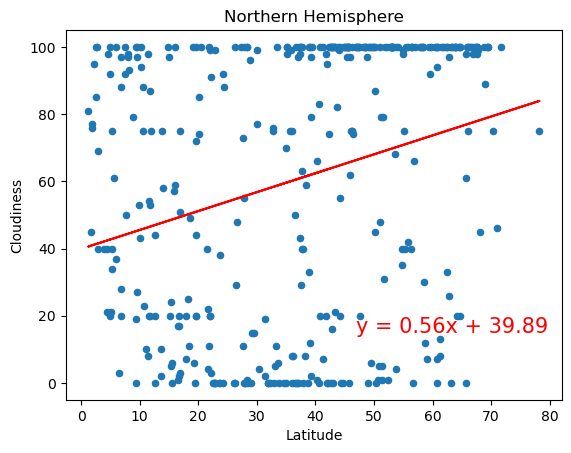

In [86]:
# Northern Hemisphere
output_image_file_name = 'Fig9'
hemisphere = 'Northern Hemisphere'
xy_regression_label = (47,15)
generate_regression(northern_hemi_df, 'Lat', 'Cloudiness',output_image_file_name,xy_regression_label, hemisphere)

The r-value is: 0.2350858652007162


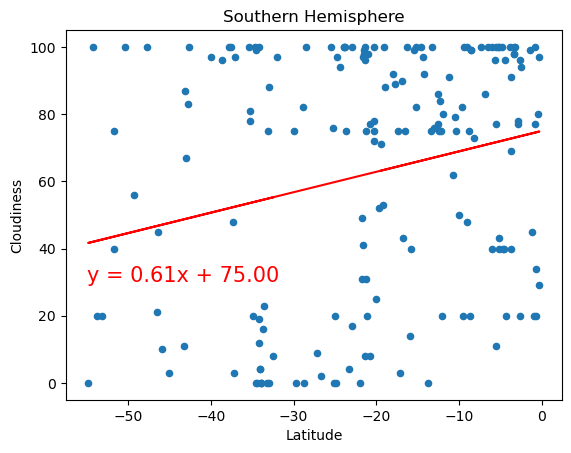

In [87]:
# Southern Hemisphere
output_image_file_name = 'Fig10'
hemisphere = 'Southern Hemisphere'
xy_regression_label = (-55,30)
generate_regression(southern_hemi_df, 'Lat', 'Cloudiness',output_image_file_name,xy_regression_label, hemisphere)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1732321177019819


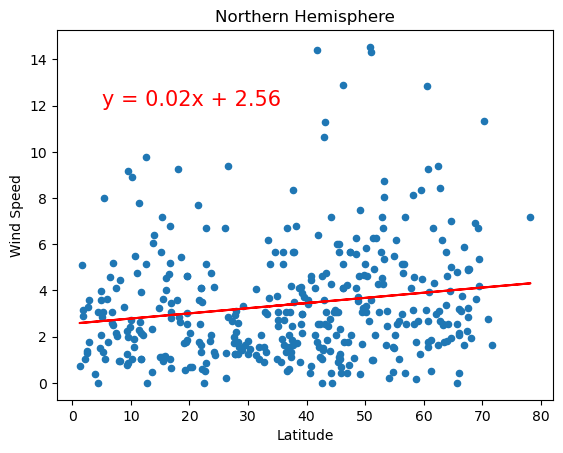

In [88]:
# Northern Hemisphere
output_image_file_name = 'Fig11'
hemisphere = 'Northern Hemisphere'
xy_regression_label = (5,12)
generate_regression(northern_hemi_df, 'Lat', 'Wind Speed',output_image_file_name,xy_regression_label, hemisphere)

The r-value is: -0.3450524185569346


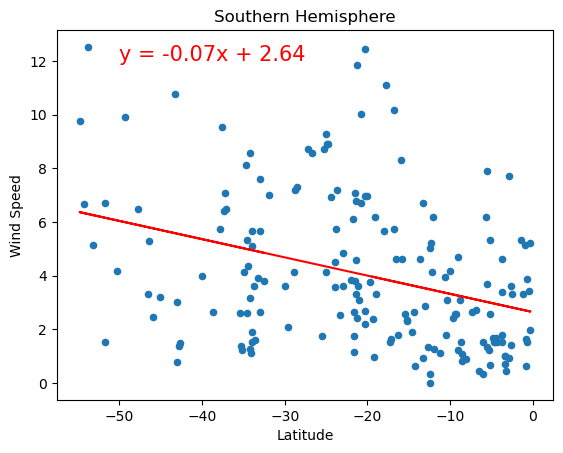

In [89]:
# Southern Hemisphere
output_image_file_name = 'Fig12'
hemisphere = 'Southern Hemisphere'
xy_regression_label = (-50,12)
generate_regression(southern_hemi_df, 'Lat', 'Wind Speed',output_image_file_name,xy_regression_label, hemisphere)

**Discussion about the linear relationship:** YOUR RESPONSE HERE